
Begin k-means clustering demo 


Clustering normalized data with k=3

Done. Clustering:
[0 1 1 1 2 2 1 1 2 0 2 0 2 2 2 1 2 1 1 2 2 1 0 2 2 2 1 2 0 0 2 0 2 1 1 2 2
 2 2 0 2 0 1 2 0 2 2 2 1 1 1 2 1 2 0 1 1 2 0 2 2 1 2 2 1 2 1 2 0 2 0 1 1 0
 2 0 2 0 2 2 2 0 1 2 2 1 2 1 2 2 2 1 1 2 1 1 0 0 2 2 0 2 2 0 2 2 2 0 2 0 2
 1 1 0 2 2 2 1 0 1 0 0 2 1 0 0 0 2 1 1 2 1 2 0 1 2 0 2 1 1 1 0 2 2 0 2 2 0
 2 1 2 2 0 2 1 0 1 0 1 0 2 0 1 2 0 2 2 0 2 0 2 2 2 0 1 0 2 0 0 0 2 0 0 2 2
 0 2 0 2 0 1 0 2 2 1 0 0 2 2 1 0 0 1 2 2 1 2 1 1 1 2 2 0 2 1 2 1 2 2 2 0 0
 1 2 0 1 2 0 2 2 2 2 1 1 1 2 0 2 1 1 0 2 1 2 0 2 1 0 2 0 1 2 2 0 2 2 2 0 2
 0 2 2 0 0 2 2 0 1 1 1 0 2 0 0 2 2 2 0 0 0 2 1 2 0 2 0 1 1 1 0 2 0 2 0 2 0
 2 2 0 1 1 1 2 2 2 0 0 2 2 2 2 1 2 2 1 1 2 0 2 1 2 0 2 2 2 2 0 2 0 2 0 2 1
 2 0 1 1 1 0 0 1 1 1 2 2 2 0 2 2 1 1 2 2 2 2 2 2 1 1 0 0 1 2 2 2 1 2 1 1 0
 0 1 2 2 2 1 2 0 0 2 1 2 1 1 0 2 2 0 2 0 1 2 0 2 0 2 2 0 2 2 2 0 1 1 1 0 1
 2 0 1 0 0 0 0 0 1 2 2 1 2 0 2 0 2 1 2 0 0 1 2 2 2 1 2 0 2 0 1 1 0 2 2 1 2
 1 1 1 2 1 

 248 [ 68.3221 120.0835]
 251 [ 66.0553 143.5245]
 252 [ 68.2348 123.1347]
 254 [ 69.1617 120.9844]
 255 [ 67.6006 120.6473]
 256 [ 67.2862 124.0352]
 258 [ 68.0828 127.9598]
 260 [ 70.1697 121.9957]
 261 [ 67.8511 123.9952]
 264 [ 68.0356 132.248 ]
 265 [ 66.941  127.1834]
 271 [ 67.8411 125.8534]
 274 [ 66.757  137.1255]
 275 [ 69.031  118.6991]
 276 [ 68.5265 124.1641]
 280 [ 66.9992 133.2951]
 282 [ 67.5767 125.08  ]
 284 [ 68.907  134.2212]
 290 [ 69.4068 120.6087]
 292 [ 67.7005 133.3406]
 294 [ 67.5377 131.7825]
 296 [ 66.2577 131.1466]
 297 [ 67.3904 130.2033]
 302 [ 69.077  124.3032]
 303 [ 68.013  135.3702]
 304 [ 68.8566 124.1988]
 307 [ 69.121  127.7444]
 308 [ 69.7877 121.3311]
 309 [ 67.482  118.2183]
 310 [ 69.0881 123.3441]
 312 [ 68.2133 115.3108]
 313 [ 67.1012 122.3844]
 316 [ 65.4985 144.0565]
 318 [ 67.9983 113.3034]
 320 [ 67.9759 130.6373]
 322 [ 67.2957 133.8677]
 323 [ 65.9595 134.8336]
 324 [ 66.5401 137.8363]
 325 [ 68.0772 112.6812]
 327 [ 69.2372 114.9262]


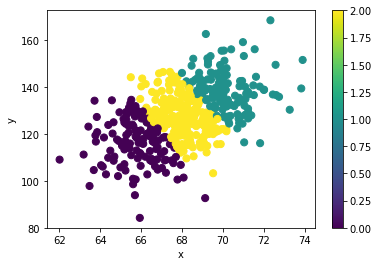

In [103]:
# k_means.py
# k-means clustering demo
# Anaconda 4.1.1

import numpy as np
import matplotlib.pyplot as plt

def mm_normalize(data):
    # min-max
    (rows, cols) = data.shape  # (20,4) for demo
    mins = np.zeros(shape=(cols), dtype=np.float32)
    maxs = np.zeros(shape=(cols), dtype=np.float32)
    for j in range(cols):
        mins[j] = np.min(data[:,j])
        maxs[j] = np.max(data[:,j])
    result = np.copy(data)
    for i in range(rows):
        for j in range(cols):
            result[i,j] = (data[i,j] - mins[j]) / (maxs[j] - mins[j])
    return (result, mins, maxs)

def distance(item, mean):
    # Euclidean distance from a data item to a mean
    sum = 0.0
    dim = len(item)
    for j in range(dim):
        sum += (item[j] - mean[j]) ** 2
    return np.sqrt(sum)

def update_clustering(norm_data, clustering, means):
    # given a (new) set of means, assign new clustering
    # return False if no change or bad clustering
    n = len(norm_data)
    k = len(means)

    new_clustering = np.copy(clustering)  # proposed new clustering
    distances = np.zeros(shape=(k), dtype=np.float32)  # from item to each mean

    for i in range(n):  # walk thru each data item
        for kk in range(k):
            distances[kk] = distance(norm_data[i], means[kk])  
        new_id = np.argmin(distances)
        new_clustering[i] = new_id
  
    if np.array_equal(clustering, new_clustering):  # no change so done
        return False

    # make sure that no cluster counts have gone to zero
    counts = np.zeros(shape=(k), dtype=np.int)
    for i in range(n):
        c_id = clustering[i]
        counts[c_id] += 1
  
    for kk in range(k):  # could use np.count_nonzero
        if counts[kk] == 0:  # bad clustering
            return False

    # there was a change, and no counts have gone 0
    for i in range(n):
        clustering[i] = new_clustering[i]  # update by ref
    return True

def update_means(norm_data, clustering, means):
    # given a (new) clustering, compute new means
    # assumes update_clustering has just been called
    # to guarantee no 0-count clusters
    (n, dim) = norm_data.shape
    k = len(means)
    counts = np.zeros(shape=(k), dtype=np.int)
    new_means = np.zeros(shape=means.shape, dtype=np.float32)  # k x dim
    for i in range(n):  # walk thru each data item
        c_id = clustering[i]
        counts[c_id] += 1
        for j in range(dim):
            new_means[c_id,j] += norm_data[i,j]  # accumulate sum

    for kk in range(k):  # each mean
        for j in range(dim):
            new_means[kk,j] /= counts[kk]  # assumes not zero

    for kk in range(k):  # each mean
        for j in range(dim):
            means[kk,j] = new_means[kk,j]  # update by ref

def initialize(norm_data, k):
    (n, dim) = norm_data.shape
    clustering = np.zeros(shape=(n), dtype=np.int)  # index = item, val = cluster ID
    for i in range(k):
        clustering[i] = i
    for i in range(k, n):
        clustering[i] = np.random.randint(0, k) 

    means = np.zeros(shape=(k,dim), dtype=np.float32)
    update_means(norm_data, clustering, means)
    return(clustering, means) 
  
def cluster(norm_data, k):
    (clustering, means) = initialize(norm_data, k)

    ok = True  # if a change was made and no bad clustering
    max_iter = 100
    sanity_ct = 1
    while sanity_ct <= max_iter:
        ok = update_clustering(norm_data, clustering, means)  # use new means
        if ok == False:
            break  # done
        update_means(norm_data, clustering, means)  # use new clustering
        sanity_ct += 1

    return clustering

def display(raw_data, clustering, k):
    (n, dim) = raw_data.shape
    print("-------------------")
    for kk in range(k):  # group by cluster ID
        for i in range(n):  # scan the raw data
            c_id = clustering[i]  # cluster ID of curr item
            if c_id == kk:  # curr item belongs to curr cluster so . . 
                print("%4d " % i, end=""); print(raw_data[i])
        print("-------------------")
def plotting(plot_data,cluster):
    (bar, kol) = plot_data.shape  # (20,4) for demo
    print(plot_data.shape)
    anu0 = np.zeros(shape=(kol), dtype=np.float)
    anu1 = np.zeros(shape=(kol), dtype=np.float)
    for jjj in range(kol):
        anu0 = plot_data[:,0]
        anu1 = plot_data[:,1]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(anu0,anu1,c=cluster,s=50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.colorbar(scatter)

#     fig.show()
def main():
    print("\nBegin k-means clustering demo \n")
    np.set_printoptions(precision=4, suppress=True)
    np.random.seed(2)

    raw_data = np.loadtxt("test.txt", dtype=np.float32,
        delimiter="|", skiprows=0, usecols=[0,1])
    (n, dim) = raw_data.shape
    
#     print("Raw data:")
#     for i in range(n):
#         print("%4d " % i, end=""); print(raw_data[i])

    (norm_data, mins, maxs) = mm_normalize(raw_data)
    
    k = 3
    print("\nClustering normalized data with k=" + str(k))
    clustering = cluster(norm_data, k)

    print("\nDone. Clustering:")
    print(clustering)

    print("\nRaw data grouped by cluster: ")
    display(raw_data, clustering, k)
    plotting(raw_data,clustering)


    print("\nEnd k-means demo ")   

if __name__ == "__main__":
    main()
